### Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

### Data importing

In [25]:
df_tweets = pd.read_csv("data/scored_tweets_total.csv")

##### Data

In [26]:
df_tweets.head()

,Stock,Datetime,user.screen_name,id_str,text,Sentiment,Known_Pumper,Price_Region,Inflection_Point
0,AXTG,2021-03-25 17:50:13+00:00,UCitnow,1375142994920271872a,#RT @ldev117: RT @UCitnow: @ShortSqueezed1 @EV...,0,0,1.0,NaN
1,AXTG,2021-03-25 17:50:48+00:00,UCitnow,1375143141058080768a,RT @UCitnow: #RT @ldev117: RT @UCitnow: @Short...,0,0,1.0,NaN
2,AXTG,2021-03-25 18:47:48+00:00,Rad7RR,1375157484063584261a,$AXTG Big OTC % Gainer!🚀🚀🚀,1,0,1.0,NaN
3,AXTG,2021-03-25 20:02:03+00:00,GetScanz,1375176172099747845a,Today’s Top Penny Stock Gainers\n\n$LTTGF $AXT...,1,0,1.0,NaN
4,AXTG,2021-03-25 20:02:48+00:00,christinebarnum,1375176361560604679a,RT @GetScanz: Today’s Top Penny Stock Gainers\...,1,0,1.0,NaN


##### Converting Datetime to datetime

In [27]:
df_tweets['Datetime'] = pd.to_datetime(df_tweets['Datetime'])

In [28]:
min_date = df_tweets['Datetime'].min()
max_date = df_tweets['Datetime'].max()

print("📆 Date range in the dataset:")
print("Start Date:", min_date)
print("End Date:  ", max_date)

📆 Date range in the dataset:
Start Date: 2021-03-23 03:32:08+00:00
End Date:   2021-04-09 01:14:21+00:00


### Plotting the stock tweet volume over time

/var/folders/q3/p7x07_8d2b9fv9qcmf0s6wyc0000gn/T/ipykernel_75116/724682068.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  tweet_volume_hourly = df_tweets['text'].resample('H').count()
/var/folders/q3/p7x07_8d2b9fv9qcmf0s6wyc0000gn/T/ipykernel_75116/724682068.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/dominiccheong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dominiccheong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


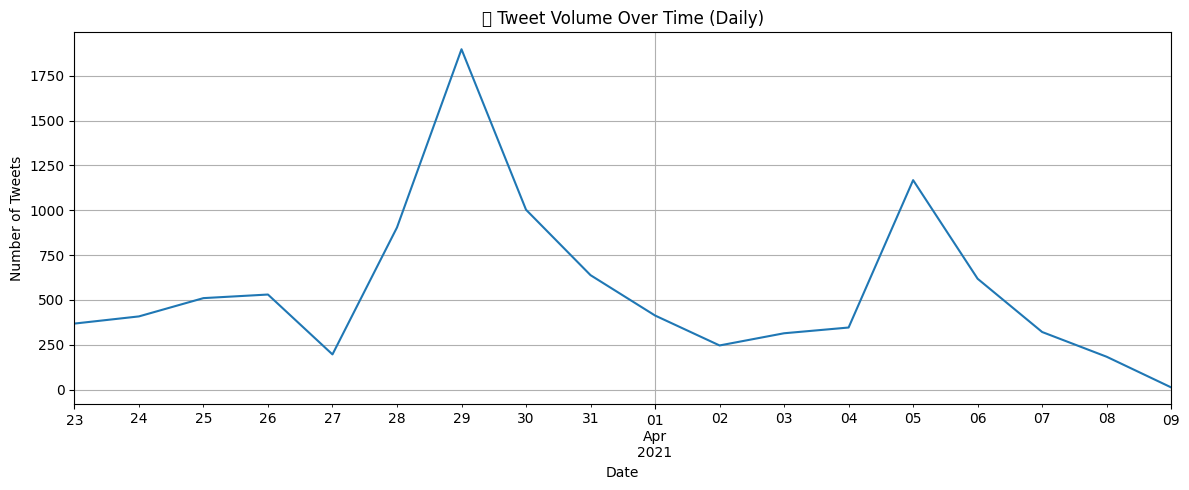

In [29]:
df_tweets.set_index('Datetime', inplace=True)

# 3. Resample by time interval and count tweets
# Daily
tweet_volume_daily = df_tweets['text'].resample('D').count()

# Hourly (if you want finer granularity)
tweet_volume_hourly = df_tweets['text'].resample('H').count()

# 4. Plotting the result
plt.figure(figsize=(12, 5))
tweet_volume_daily.plot()
plt.title('📅 Tweet Volume Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.tight_layout()
plt.show()

df_tweets.reset_index(inplace=True)

### Stock tickers

In [ ]:
df_tweets["Stock"].unique()

10076

In [33]:
d = {}

for stockname in df_tweets["Stock"]:
    if stockname not in d:
        d[stockname] = 0
    d[stockname] += 1

In [34]:
d

{'AXTG': 23,
 'CERPQ': 348,
 'WNRS': 132,
 'DPLN': 103,
 'SOL': 1674,
 'GYST': 1094,
 'TTCM': 518,
 'SEAC': 560,
 'EEENF': 5624}

Need to extract stock price movement for these tickers